# Deconvolution

Problem Setup: We observe $\{\tilde{x}_i\}$ and $\{\tilde{y}_i\}$ with known addative form 
$$
\tilde{x}_i = x_i + \epsilon_i, \\
\tilde{y}_i = y_i + \nu_i,
$$
and known error distributions $\epsilon_i\sim N(0, \sigma_i^2)$ and $\nu_i\sim N(0, \gamma_i^2)$.

The denoised data points come from distributions $x_i\sim F_x$ and $y_i\sim F_y$. We want to test 

$$
H_0: F_x = F_y
$$

We'll pursue the two-stage approach to solving this

1. Recover an approximation of the distributions $\hat{F}_x$ and $\hat{F}_y$
2. Run a K-S test on these approximations. 

For step 1, I found an interesting (AND RECENT) paper on this by [Brad Efron in Biometrika](https://academic-oup-com.ezp-prod1.hul.harvard.edu/biomet/article/103/1/1/2390141) from 2016 where they take the approach of assuming an exponential family of distributions on ${F}_x$ and ${F}_y$ and proceeding to estimate them using an Empirical Bayes approach. 
In it they cite a broad litterature on the deconvolution problem, in particular they cite [Stefanski L. & Carroll R. J. (1990)](https://www.tandfonline.com/doi/abs/10.1080/02331889008802238) as a prime example of estimators with relatively good asymptotic properties. 

In [13]:
?DeconCdf

In [10]:
n1 <- 500
x1 <- rnorm(n1, sd = 1)

# sig1 <- 0.5

sig1 = rgamma(n1, 2, 20)
u1 <- rnorm(n1, 0, sig1) #ifelse(runif(n1) > 0.5, 1, -1) * rexp(n1, rate = 1/sig1)
w1 <- x1 + u1


bw1 <- bw.dnrd(w1, sig = sig1, error = "normal")
f1 <- DeconPdf(w1, sig1, error = "normal", bw = bw1, fft = TRUE)
F1 <- DeconCdf(w1, sig1, seq(-4,4,length.out=100), error = "normal", bw = bw1, fft = TRUE)

Warning message in DeconCdf(w1, sig1, seq(-4, 4, length.out = 100), error = "normal", :
“non-matched further arguments are disregarded”

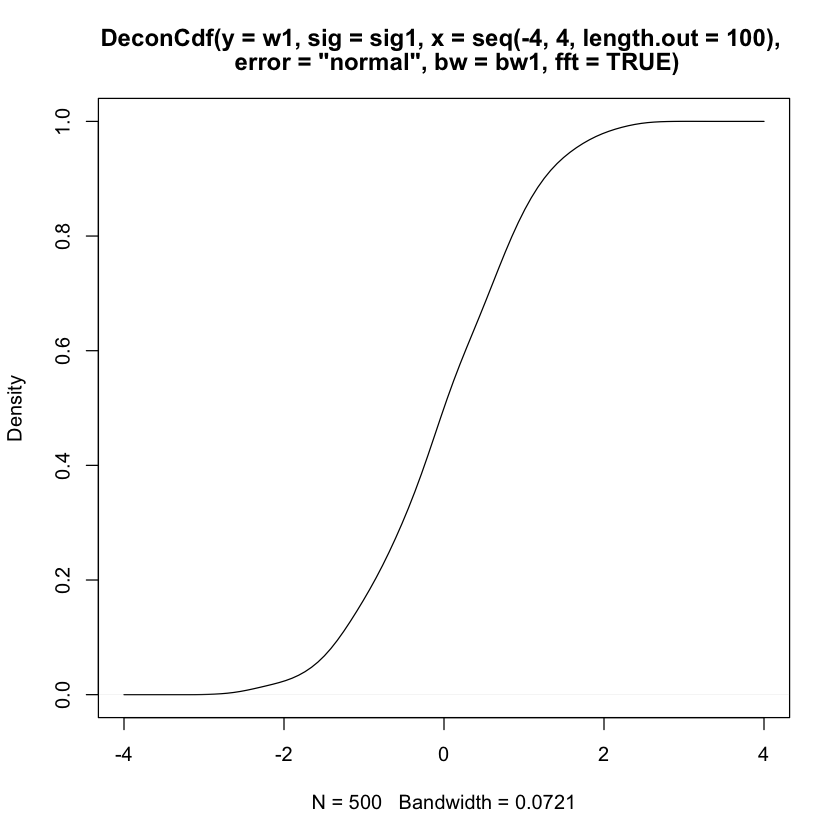

In [11]:
plot(F1)

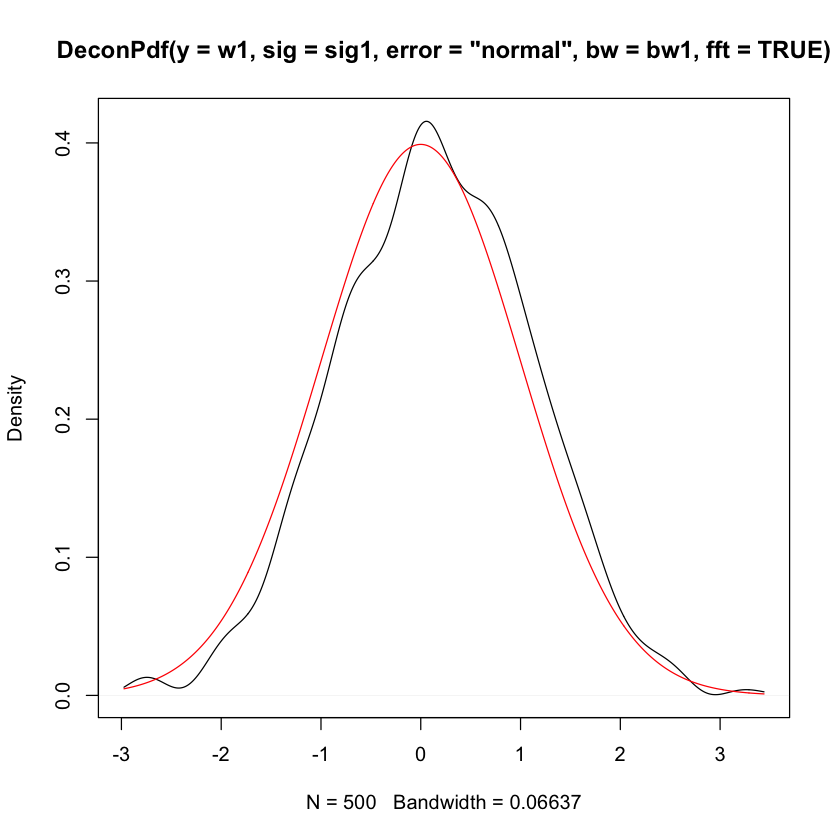

In [5]:
plot(f1)
lines(f1$x, dnorm(f1$x), col = 2)

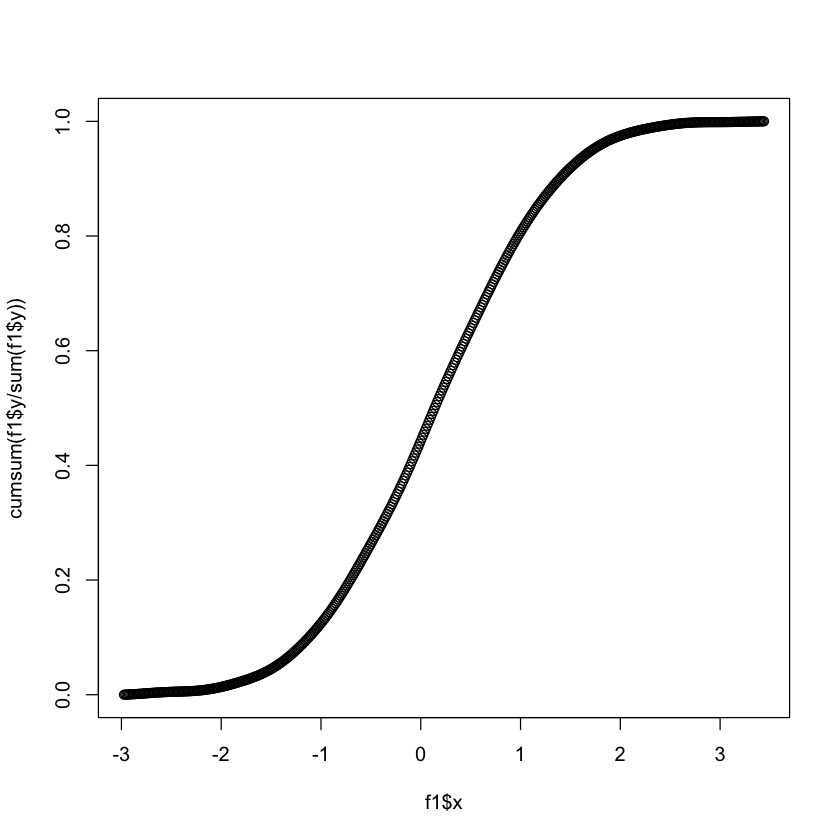

In [6]:
plot(f1$x, cumsum(f1$y/sum(f1$y)))